Libraries

In [1]:
from sklearn.datasets import make_blobs, make_circles, make_moons
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold


Datasets

 - Synthetic datasets

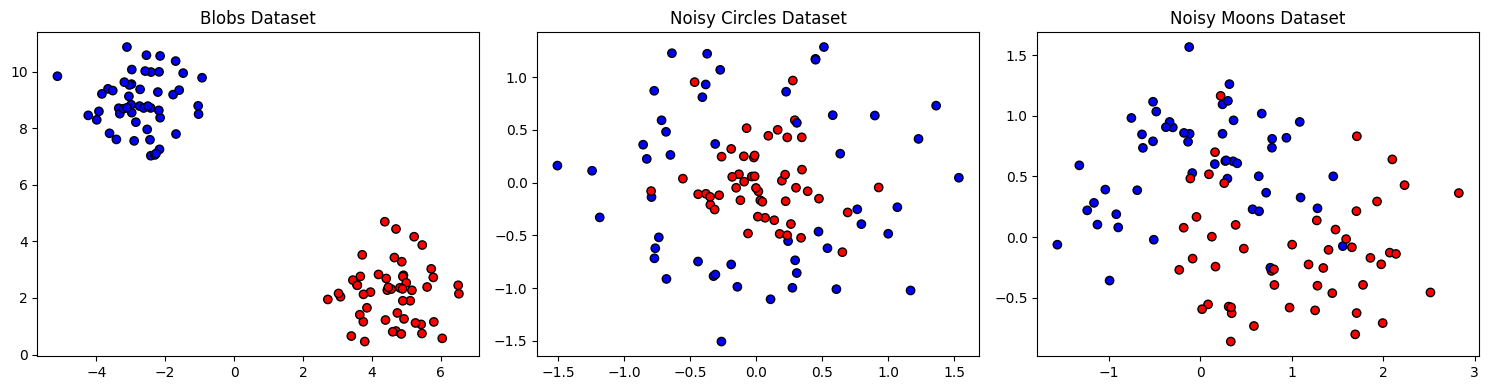

In [2]:
random_state = 42

# Generate the datasets
X_blobs, y_blobs = make_blobs(n_samples=100, centers=2, n_features=2, random_state=random_state)
X_circles, y_circles = make_circles(n_samples=100, noise=0.3, factor=0.1, random_state=random_state)
X_moons, y_moons = make_moons(n_samples=100, noise=0.3, random_state=random_state)

# Plot the datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='bwr', edgecolors='k')
axes[0].set_title("Blobs Dataset")

axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='bwr', edgecolors='k')
axes[1].set_title("Noisy Circles Dataset")

axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='bwr', edgecolors='k')
axes[2].set_title("Noisy Moons Dataset")

plt.tight_layout()
plt.show()

In [3]:
# Reproducibility
random_state = 42

# Generate datasets
datasets = {
    "blobs": make_blobs(n_samples=100, centers=2, n_features=2, random_state=random_state),
    "noisy_circles": make_circles(n_samples=100, noise=0.3, factor=0.1, random_state=random_state),
    "noisy_moons": make_moons(n_samples=100, noise=0.3, random_state=random_state),
}

# Define classical models
models = {
    "SVC linear": SVC(kernel='linear', random_state=random_state),
    "SVC poly": SVC(kernel='poly', degree=3, random_state=random_state),
    "SVC rbf": SVC(kernel='rbf', random_state=random_state)
}

# Store results
results = []

# Stratified K-Fold setup
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Evaluate each model on each dataset
for model_name, model in models.items():
    for dataset_name, (X, y) in datasets.items():
        acc_scores = []
        f1_scores = []

        # Stratified K-Fold loop
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            acc_scores.append(accuracy_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        acc_mean, acc_std = np.mean(acc_scores), np.std(acc_scores)
        f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

        results.append({
            "Type": "classical",
            "Model": model_name,
            "Dataset": dataset_name,
            "ACC": f"{acc_mean:.3f} ± {acc_std:.3f}",
            "F1": f"{f1_mean:.3f} ± {f1_std:.3f}"
        })

# Create results table
df_results = pd.DataFrame(results)

# Pivot for nice comparison
df_pivot = df_results.pivot(index=["Type", "Model"], columns="Dataset", values=["ACC", "F1"])

print("\nCross-validated results (mean ± std):\n")
print(df_pivot)



Cross-validated results (mean ± std):

                                ACC                                \
Dataset                       blobs  noisy_circles    noisy_moons   
Type      Model                                                     
classical SVC linear  1.000 ± 0.000  0.540 ± 0.073  0.850 ± 0.089   
          SVC poly    1.000 ± 0.000  0.550 ± 0.071  0.790 ± 0.102   
          SVC rbf     1.000 ± 0.000  0.900 ± 0.095  0.900 ± 0.055   

                                 F1                                
Dataset                       blobs  noisy_circles    noisy_moons  
Type      Model                                                    
classical SVC linear  1.000 ± 0.000  0.619 ± 0.083  0.845 ± 0.099  
          SVC poly    1.000 ± 0.000  0.686 ± 0.041  0.744 ± 0.163  
          SVC rbf     1.000 ± 0.000  0.896 ± 0.100  0.900 ± 0.055  


 - Real datasets

In [4]:
dir = "C:/Users/jiriv/Documents/škola/Diplom_thesis/Quantum-feature-maps/"
dataset_save = f"{dir}Dataset/Toxicity-13F.csv"
dataset_5F = f"{dir}Dataset/Toxicity-5F.csv"
dataset_8F = f"{dir}Dataset/Toxicity-8F.csv"

df = pd.read_csv(dataset_save)
#print(df['Class'].value_counts())
df['Class'] = df['Class'].apply(lambda v: 1 if str(v).strip().lower().startswith('non') else 0)
#print(df['Class'].value_counts())
#df.head()

df5 = pd.read_csv(dataset_5F)
#print(df5['Class'].value_counts())
#df5.head()
X5 = df5.drop(columns=['Class']).values
y5 = df5['Class'].values

df8 = pd.read_csv(dataset_8F)

In [5]:
df5 = pd.read_csv(dataset_5F)  # dataset_5F should be defined in your environment
X5 = df5.drop(columns=['Class']).values
y5 = df5['Class'].values

# --- Define models ---
models = {
    "SVC linear": SVC(kernel='linear', random_state=random_state),
    "SVC poly": SVC(kernel='poly', degree=3, random_state=random_state),
    "SVC rbf": SVC(kernel='rbf', random_state=random_state)
}

# --- Stratified K-Fold setup ---
n_splits = 4
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# --- Evaluate ---
results = []

for model_name, model in models.items():
    acc_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(X5, y5):
        X_train, X_test = X5[train_index], X5[test_index]
        y_train, y_test = y5[train_index], y5[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))  # weighted for multiclass safety

    # Aggregate results
    acc_mean, acc_std = np.mean(acc_scores), np.std(acc_scores)
    f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

    results.append({
        "Type": "classical",
        "Model": model_name,
        "Dataset": "df5",
        "ACC": f"{acc_mean:.3f} ± {acc_std:.3f}",
        "F1": f"{f1_mean:.3f} ± {f1_std:.3f}"
    })

# --- Make results table ---
df_results = pd.DataFrame(results)
df_pivot = df_results.pivot(index=["Type", "Model"], columns="Dataset", values=["ACC", "F1"])

print("\nCross-validated results for df5 (mean ± std):\n")
print(df_pivot)


Cross-validated results for df5 (mean ± std):

                                ACC             F1
Dataset                         df5            df5
Type      Model                                   
classical SVC linear  0.672 ± 0.003  0.541 ± 0.004
          SVC poly    0.672 ± 0.003  0.541 ± 0.004
          SVC rbf     0.672 ± 0.003  0.541 ± 0.004


Feynman-Kac

In [4]:
def potential(pts, kind="quadratic"):
    """Potential V(x) evaluated on points pts with shape (..., d)."""

    if kind == "zero":
        return np.zeros(pts.shape[:-1])
    if kind == "quadratic":
        return 0.5 * np.sum(pts**2, axis=-1)
    if kind == "double_well":
        r2 = np.sum(pts**2, axis=-1)
        return (r2 - 1.0)**2
    
    raise ValueError("unknown potential kind")

def free_heat_kernel(x, y, T):
    """Analytic heat kernel (free Brownian) in R^d between x and y at time T."""
    d = x.size
    prefactor = (2 * np.pi * T) ** (-d / 2)
    sqdist = np.sum((x - y) ** 2)
    return prefactor * np.exp(-sqdist / (2.0 * T))

def bridge_expectation_mc(x, y, T, steps, M, potential_fn):
    d = x.size
    dt = T / steps
    times = np.linspace(0.0, T, steps+1)

    dW = np.random.normal(0.0, np.sqrt(dt), size=(M, steps, d))
    W = np.concatenate([np.zeros((M,1,d)), np.cumsum(dW, axis=1)], axis=1)
    W_T = W[:, -1:, :]

    frac = (times / T)[None, :, None]
    bridge = (x + frac*(y - x))[None, :, :] + W - frac * W_T

    Vvals = potential_fn(bridge)
    S = np.sum(Vvals[:, :-1], axis=1) * dt
    return np.mean(np.exp(-S))


def fk_kernel_matrix(X, Y, T, steps, M, potential_fn):
    N, d = X.shape
    M2 = Y.shape[0]
    K = np.zeros((N, M2))
    for i in range(N):
        for j in range(M2):
            p0 = free_heat_kernel(X[i], Y[j], T)
            E = bridge_expectation_mc(X[i], Y[j], T, steps, M, potential_fn)
            K[i, j] = p0 * E
    return K
    


In [5]:
if __name__ == "__main__":
    n_samples = 200
    T = 0.2
    steps = 40
    M = 200
    potential_type = "quadratic"   # options: zero, quadratic, double_well
    test_size = 0.25
    C = 1.0
    seed = 0

    # Generate synthetic dataset
    X, y = X_moons, y_moons
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)

    # Define potential function
    potential_fn = lambda pts: potential(pts, kind=potential_type)

    # Compute kernel matrices
    K_train = fk_kernel_matrix(X_train, X_train, T, steps, M, potential_fn)
    K_test = fk_kernel_matrix(X_test, X_train, T, steps, M, potential_fn)

    # Train SVM with precomputed kernel
    clf = SVC(kernel='precomputed', C=C, random_state=seed)
    clf.fit(K_train, y_train)

    # Evaluate
    y_pred = clf.predict(K_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Test ACC: {acc:.3f}, F1: {f1:.3f}")

Test ACC: 1.000, F1: 1.000


In [18]:
#!/usr/bin/env python3
"""
compare_fk_vs_classical.py

Compare classical SVMs (linear, poly, rbf) against an SVM using a Feynman-Kac kernel
on several toy datasets using Stratified K-Fold cross-validation.

Note: FK kernel uses Monte Carlo and can be slow. Reduce M or steps for faster runs.
"""
import numpy as np
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from time import time

# ---------------------------
# FK kernel implementation
# ---------------------------
def potential(pts, kind="quadratic"):
    # pts shape (..., d)
    if kind == "zero":
        return np.zeros(pts.shape[:-1])
    if kind == "quadratic":
        return 0.5 * np.sum(pts**2, axis=-1)
    if kind == "double_well":
        r2 = np.sum(pts**2, axis=-1)
        return (r2 - 1.0)**2
    raise ValueError("unknown potential kind")

def free_heat_kernel(x, y, T):
    d = x.size
    pref = (2 * np.pi * T) ** (-d / 2)
    sqdist = np.sum((x - y)**2)
    return pref * np.exp(-sqdist / (2.0 * T))

def bridge_expectation_mc(x, y, T, steps, M, potential_fn):
    """
    Monte-Carlo estimate of E_bridge[ exp(-int_0^T V(B_s) ds) ] for Brownian bridge x->y.
    x, y: arrays shape (d,)
    """
    d = x.size
    dt = T / steps
    # times = np.linspace(0, T, steps+1)  # not needed explicitly here
    # sample Brownian increments for M paths
    dW = np.random.normal(0.0, np.sqrt(dt), size=(M, steps, d))
    W = np.concatenate([np.zeros((M, 1, d)), np.cumsum(dW, axis=1)], axis=1)  # (M, steps+1, d)
    W_T = W[:, -1:, :]  # (M,1,d)
    times_frac = (np.linspace(0.0, T, steps+1) / T)[None, :, None]  # (1, steps+1, 1)
    x_arr = x[None, None, :]  # (1,1,d)
    y_arr = y[None, None, :]  # (1,1,d)
    B = x_arr + times_frac * (y_arr - x_arr) + W - times_frac * W_T  # (M, steps+1, d)
    Vvals = potential_fn(B)  # (M, steps+1)
    # trapezoid or left Riemann — use left Riemann for simplicity (exclude last point)
    integral = np.sum(Vvals[:, :-1], axis=1) * dt  # (M,)
    weights = np.exp(-integral)
    return np.mean(weights)

def fk_kernel_pair(x, y, T, steps, M, potential_fn):
    p0 = free_heat_kernel(x, y, T)
    if M <= 0:
        return p0
    w = bridge_expectation_mc(x, y, T, steps, M, potential_fn)
    return p0 * w

def fk_kernel_matrix(Xa, Xb, T, steps, M, potential_fn):
    """
    Compute matrix K where K[i,j] = FK_kernel(Xa[i], Xb[j]).
    Xa: (n_a, d), Xb: (n_b, d)
    """
    na = Xa.shape[0]
    nb = Xb.shape[0]
    K = np.zeros((na, nb))
    for i in range(na):
        xi = Xa[i]
        for j in range(nb):
            K[i, j] = fk_kernel_pair(xi, Xb[j], T, steps, M, potential_fn)
    return K

# ---------------------------
# Experiment settings
# ---------------------------
random_state = 42
np.random.seed(random_state)

# Monte Carlo / FK parameters (tune for speed/accuracy)
FK_T = 0.7
FK_steps = 30
FK_M = 300
FK_potential = "quadratic"

# Dataset & CV settings
datasets = {
    #"blobs": make_blobs(n_samples=100, centers=2, n_features=2, random_state=random_state),
    #"noisy_circles": make_circles(n_samples=100, noise=0.8, factor=0.1, random_state=random_state),
    #"noisy_moons": make_moons(n_samples=100, noise=0.8, random_state=random_state),
    "toxicity_5F": (X5, y5),
}

models = {
    "SVC linear": SVC(kernel='linear', random_state=random_state),
    "SVC poly": SVC(kernel='poly', degree=3, random_state=random_state),
    "SVC rbf": SVC(kernel='rbf', random_state=random_state),
    # The FK model will be handled specially in the CV loop because it requires precomputed kernels
    "SVC FK": None
}

n_splits = 4
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

results = []

# ---------------------------
# Evaluation loop
# ---------------------------
for model_name, model in models.items():
    for dataset_name, (X, y) in datasets.items():
        acc_scores = []
        f1_scores = []
        times_fold = []

        for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            t0 = time()
            if model_name == "SVC FK":
                # compute FK kernel matrices for this fold
                potential_fn = lambda pts: potential(pts, kind=FK_potential)
                # Train kernel: train vs train
                K_train = fk_kernel_matrix(X_train, X_train, T=FK_T, steps=FK_steps, M=FK_M, potential_fn=potential_fn)
                # slight regularization for numerical stability
                K_train += 1e-10 * np.eye(K_train.shape[0])
                clf = SVC(kernel='precomputed', C=1.0, random_state=random_state)
                clf.fit(K_train, y_train)
                # Test kernel: test vs train
                K_test = fk_kernel_matrix(X_test, X_train, T=FK_T, steps=FK_steps, M=FK_M, potential_fn=potential_fn)
                y_pred = clf.predict(K_test)
            else:
                # classical model, fit on raw features
                mdl = model
                mdl.fit(X_train, y_train)
                y_pred = mdl.predict(X_test)

            t1 = time()
            times_fold.append(t1 - t0)

            acc_scores.append(accuracy_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

            # Optional: print progress for FK which can be slow
            if model_name == "SVC FK":
                print(f"[{dataset_name}] Fold {fold_idx}/{n_splits} for FK model done (time {t1-t0:.1f}s)")

        acc_mean, acc_std = np.mean(acc_scores), np.std(acc_scores)
        f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)
        time_mean = np.mean(times_fold)

        results.append({
            "Type": "classical" if model_name != "SVC FK" else "fk",
            "Model": model_name,
            "Dataset": dataset_name,
            "ACC": f"{acc_mean:.3f} ± {acc_std:.3f}",
            "F1": f"{f1_mean:.3f} ± {f1_std:.3f}",
            "Time (s/fold avg)": f"{time_mean:.1f}"
        })

# ---------------------------
# Present results
# ---------------------------
df_results = pd.DataFrame(results)
df_pivot_acc = df_results.pivot(index=["Type", "Model"], columns="Dataset", values="ACC")
df_pivot_f1 = df_results.pivot(index=["Type", "Model"], columns="Dataset", values="F1")
df_pivot_time = df_results.pivot(index=["Type", "Model"], columns="Dataset", values="Time (s/fold avg)")

print("\nCross-validated ACC (mean ± std):\n")
print(df_pivot_acc)
print("\nCross-validated F1 (mean ± std):\n")
print(df_pivot_f1)
print("\nAverage time per fold (seconds):\n")
print(df_pivot_time)


[toxicity_5F] Fold 1/4 for FK model done (time 32.5s)
[toxicity_5F] Fold 2/4 for FK model done (time 32.2s)
[toxicity_5F] Fold 3/4 for FK model done (time 32.4s)
[toxicity_5F] Fold 4/4 for FK model done (time 32.8s)

Cross-validated ACC (mean ± std):

Dataset                 toxicity_5F
Type      Model                    
classical SVC linear  0.672 ± 0.003
          SVC poly    0.672 ± 0.003
          SVC rbf     0.672 ± 0.003
fk        SVC FK      0.672 ± 0.003

Cross-validated F1 (mean ± std):

Dataset                 toxicity_5F
Type      Model                    
classical SVC linear  0.804 ± 0.002
          SVC poly    0.804 ± 0.002
          SVC rbf     0.804 ± 0.002
fk        SVC FK      0.804 ± 0.002

Average time per fold (seconds):

Dataset              toxicity_5F
Type      Model                 
classical SVC linear         0.3
          SVC poly           0.0
          SVC rbf            0.0
fk        SVC FK            32.5



Dataset: Concentric circles


building features:   0%|          | 0/40 [00:00<?, ?it/s]

building features: 100%|██████████| 40/40 [00:11<00:00,  3.59it/s]


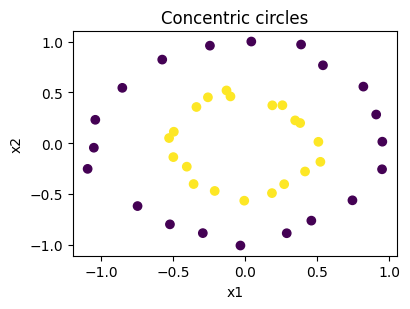

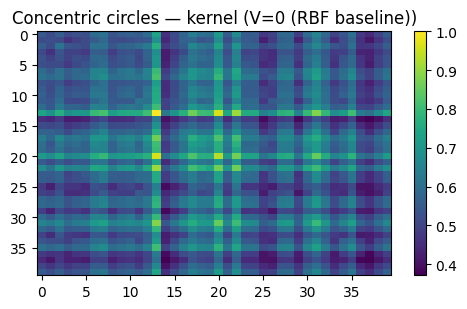

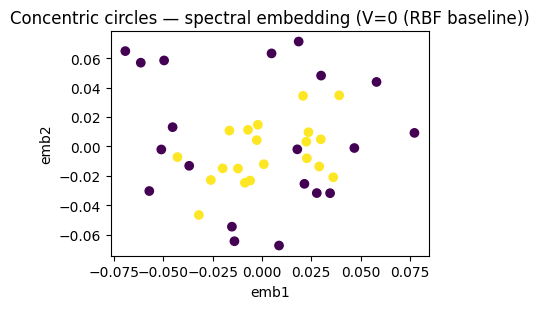

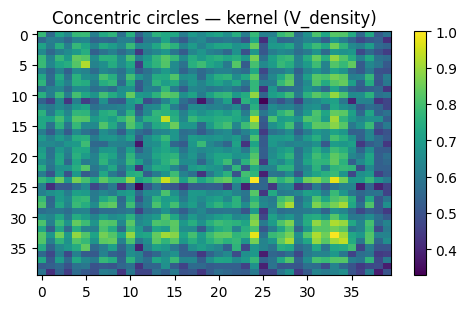

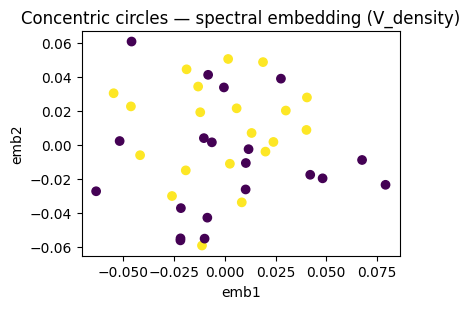

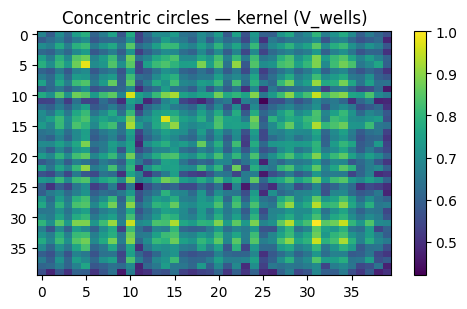

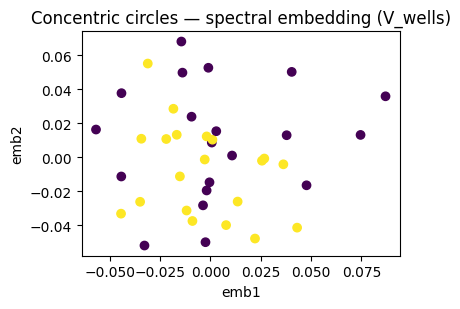

Done (landmark FK demo).


In [23]:
# run_landmark_fk.py
import numpy as np
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt
from tqdm import trange

np.random.seed(1)

####### Simulation + feature construction (landmark-style) #######

def simulate_paths_and_logweights(x0, V_fun, T=1.0, Nsteps=25, Mpaths=100, rng=None):
    """Simulate Mpaths unconditioned Brownian endpoints and return endpoints and log-weights."""
    if rng is None:
        rng = np.random.default_rng()
    d = x0.size
    dt = T / Nsteps
    sqrt_dt = np.sqrt(dt)

    endpoints = np.zeros((Mpaths, d))
    logw = np.zeros(Mpaths)

    for m in range(Mpaths):
        z = x0.copy()
        lw = 0.0
        for k in range(Nsteps):
            z = z + sqrt_dt * rng.normal(size=d)
            lw += - V_fun(z) * dt
        endpoints[m] = z
        logw[m] = lw

    return endpoints, logw

def build_feature_from_endpoints_logspace(endpoints, logw, centers, sigma, normalize_weights=True):
    """Construct feature vector phi for a single x from endpoints and log-weights."""
    M = endpoints.shape[0]
    max_lw = np.max(logw)
    w = np.exp(logw - max_lw)        # stabilized weights
    if normalize_weights:
        w = w / (w.sum() + 1e-12)

    D2 = cdist(endpoints, centers, 'sqeuclidean')
    G = np.exp(- D2 / (2 * sigma**2))   # (M, m)
    phi = (w[:, None] * G).sum(axis=0) / np.sqrt(max(1, M))
    return phi

def choose_centers_kmeans_or_random(X, m_landmarks=30, rng=None, use_kmeans=True):
    if rng is None:
        rng = np.random.default_rng()
    if use_kmeans:
        kmeans = KMeans(n_clusters=m_landmarks, random_state=int(rng.integers(0,2**31-1)))
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
    else:
        idx = rng.choice(len(X), size=m_landmarks, replace=False)
        centers = X[idx]
    return centers

def median_sigma_heuristic(centers, factor=0.5):
    if centers.shape[0] < 2:
        return 1.0
    med = np.median(pdist(centers))
    sigma = max(1e-6, med * factor)
    return sigma

def fk_kernel_matrix_landmarks_from_first(X, V_fun,
                                         T=1.0, Nsteps=25, Mpaths=100,
                                         m_landmarks=30, sigma=None,
                                         centers=None, rng=None,
                                         use_kmeans_centers=True,
                                         normalize_weights=True,
                                         symmetrize_and_jitter=True,
                                         verbose=True):
    if rng is None:
        rng = np.random.default_rng(0)
    n, d = X.shape

    if centers is None:
        centers = choose_centers_kmeans_or_random(X, m_landmarks, rng=rng, use_kmeans=use_kmeans_centers)

    if sigma is None:
        sigma = median_sigma_heuristic(centers, factor=0.5)

    m = centers.shape[0]
    Phi = np.zeros((n, m))

    iterator = trange(n, desc="building features") if verbose else range(n)
    for i in iterator:
        endpoints, logw = simulate_paths_and_logweights(X[i], V_fun, T=T, Nsteps=Nsteps, Mpaths=Mpaths, rng=rng)
        Phi[i] = build_feature_from_endpoints_logspace(endpoints, logw, centers, sigma, normalize_weights=normalize_weights)

    K = Phi @ Phi.T
    K = K / (np.max(np.abs(K)) + 1e-12)

    if symmetrize_and_jitter:
        K = 0.5 * (K + K.T)
        K = K + 1e-8 * np.eye(n)

    return K, Phi, centers, sigma

####### Example potentials (same style as your code) #######

def V_zero_factory():
    return lambda x: 0.0

def V_wells_factory(centers, a=1.0):
    centers = np.asarray(centers)
    def V(x):
        x = np.atleast_1d(x)
        D2 = np.sum((x - centers)**2, axis=1)
        return float(a * np.min(D2))
    return V

def V_density_knn_factory(X, k=6, lam=5.0):
    # lightweight density proxy using neighbor distances
    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
    dists, idx = nbrs.kneighbors(X)
    mean_d = dists[:,1:].mean(axis=1)
    dens_proxy = 1.0 / (mean_d + 1e-12)
    dmin, dmax = dens_proxy.min(), dens_proxy.max()
    def V(x):
        x = np.atleast_2d(x)
        dists_x, _ = nbrs.kneighbors(x, n_neighbors=k+1)
        md = dists_x[:,1:].mean(axis=1)
        dp = 1.0 / (md + 1e-12)
        dp_norm = (dp - dmin) / (dmax - dmin + 1e-12)
        return float(lam * (1.0 - dp_norm[0]))
    return V

####### Datasets (smaller for demo) #######

n_points = 40
X1, y1 = make_blobs(n_samples=n_points, centers=[[-2,0],[2,0]], cluster_std=0.8, random_state=2)
X2, y2 = make_circles(n_samples=n_points, factor=0.5, noise=0.05, random_state=3)
#datasets = [("Two blobs", X1, y1), ("Concentric circles", X2, y2)]
datasets = [("Concentric circles", X2, y2)]

results = []

for name, X, y in datasets:
    print("\nDataset:", name)
    # define potentials
    V0 = V_zero_factory()
    Vdens = V_density_knn_factory(X, k=6, lam=5.0)
    if name == "Two blobs":
        wells_centers = np.array([[-2,0],[2,0]])
    else:
        wells_centers = np.array([X[y==0].mean(axis=0), X[y==1].mean(axis=0)])
    Vwells = V_wells_factory(wells_centers, a=2.0)

    # common parameters (light demo)
    params = dict(T=3, Nsteps=80, Mpaths=300, m_landmarks=30,
                  use_kmeans_centers=True, normalize_weights=True, verbose=True)

    K0, Phi0, centers0, sigma0 = fk_kernel_matrix_landmarks_from_first(X, V0, **params)
    Kd, Phid, centersd, sigmad = fk_kernel_matrix_landmarks_from_first(X, Vdens, **params)
    Kw, Phiw, centersw, sigmaw = fk_kernel_matrix_landmarks_from_first(X, Vwells, **params)

    results.append({"name": name, "X": X, "y": y,
                    "K_zero": K0, "K_density": Kd, "K_wells": Kw})

# Visualization
for res in results:
    X = res["X"]; y = res["y"]; name = res["name"]
    plt.figure(figsize=(4.2,3.2))
    plt.title(name)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.tight_layout()
    plt.show()

    for title, K in [("V=0 (RBF baseline)", res["K_zero"]), ("V_density", res["K_density"]), ("V_wells", res["K_wells"])]:
        plt.figure(figsize=(5,3.2))
        plt.title(f"{name} — kernel ({title})")
        plt.imshow(K, aspect='auto')
        plt.colorbar()
        plt.tight_layout()
        plt.show()

        Ke = (K + K.T) / 2.0
        se = SpectralEmbedding(n_components=2, affinity='precomputed', random_state=0)
        emb = se.fit_transform(Ke)
        plt.figure(figsize=(4.2,3.2))
        plt.title(f"{name} — spectral embedding ({title})")
        plt.scatter(emb[:,0], emb[:,1], c=y)
        plt.xlabel("emb1"); plt.ylabel("emb2")
        plt.tight_layout()
        plt.show()

print("Done (landmark FK demo).")


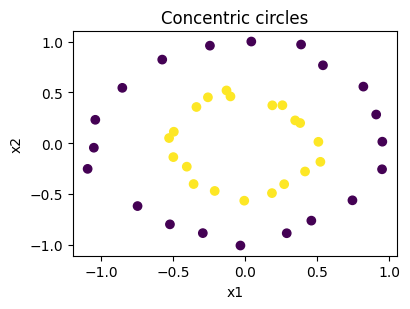

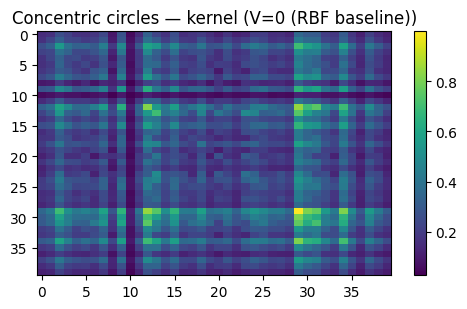

V=0 (RBF baseline) — ACC = 0.550, F1 = 0.540


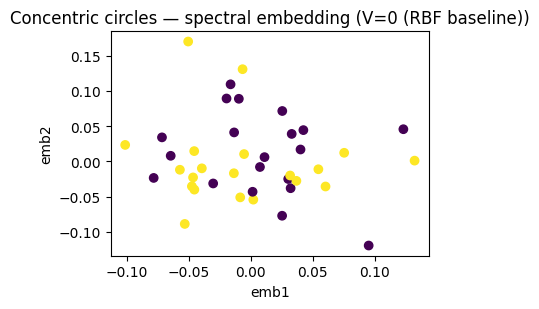

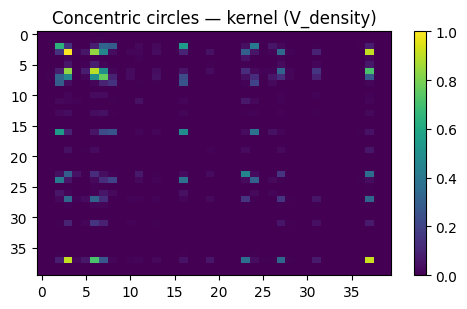

V_density — ACC = 0.450, F1 = 0.440


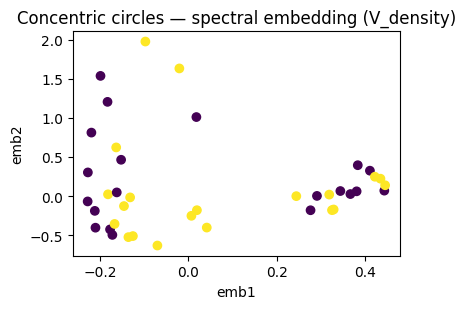

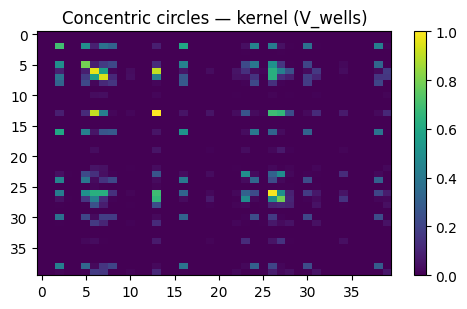

V_wells — ACC = 0.675, F1 = 0.660


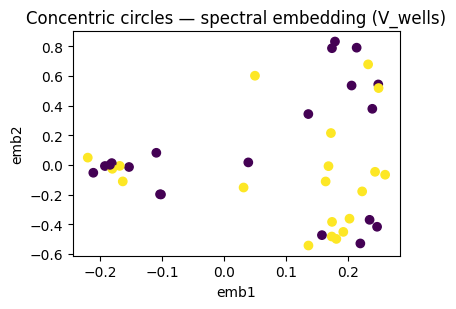

Done (landmark FK demo).


In [22]:
def evaluate_embeddings(X_emb, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    acc_scores = []
    f1_scores = []

    clf = SVC(kernel='rbf', gamma='scale')

    for train_idx, test_idx in skf.split(X_emb, y):
        X_train, X_test = X_emb[train_idx], X_emb[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    return np.mean(acc_scores), np.mean(f1_scores)

for res in results:
    X = res["X"]; y = res["y"]; name = res["name"]
    plt.figure(figsize=(4.2,3.2))
    plt.title(name)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.tight_layout()
    plt.show()

    for title, K in [("V=0 (RBF baseline)", res["K_zero"]), ("V_density", res["K_density"]), ("V_wells", res["K_wells"])]:
        plt.figure(figsize=(5,3.2))
        plt.title(f"{name} — kernel ({title})")
        plt.imshow(K, aspect='auto')
        plt.colorbar()
        plt.tight_layout()
        plt.show()

        Ke = (K + K.T) / 2.0
        se = SpectralEmbedding(n_components=2, affinity='precomputed', random_state=0)
        emb = se.fit_transform(Ke)
        acc, f1 = evaluate_embeddings(emb, y)
        print(f"{title} — ACC = {acc:.3f}, F1 = {f1:.3f}")
        plt.figure(figsize=(4.2,3.2))
        plt.title(f"{name} — spectral embedding ({title})")
        plt.scatter(emb[:,0], emb[:,1], c=y)
        plt.xlabel("emb1"); plt.ylabel("emb2")
        plt.tight_layout()
        plt.show()

print("Done (landmark FK demo).")



=== Dataset: Two blobs
 Building K (V=0) ...
 Building K (V_density) ...
 Building K (V_wells) ...

Results for Two blobs:
 V=0      — ACC = 1.000, F1 = 1.000
 V_density— ACC = 1.000, F1 = 1.000
 V_wells  — ACC = 1.000, F1 = 1.000


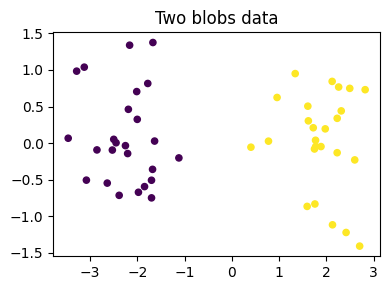

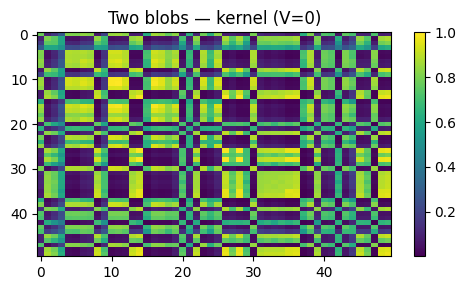

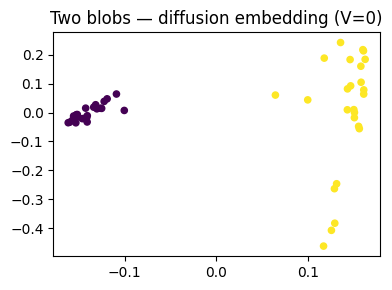

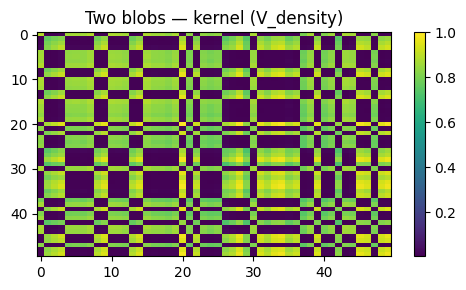

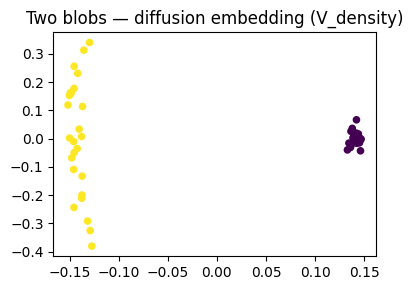

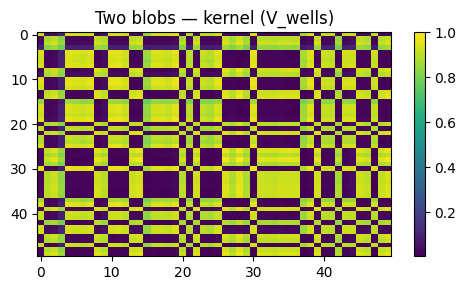

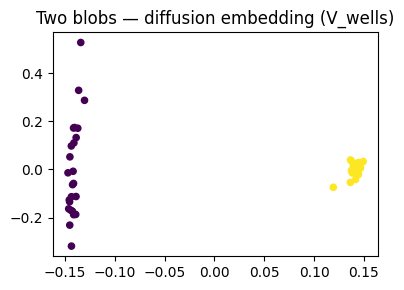


=== Dataset: Concentric circles
 Building K (V=0) ...
 Building K (V_density) ...
 Building K (V_wells) ...

Results for Concentric circles:
 V=0      — ACC = 1.000, F1 = 1.000
 V_density— ACC = 0.620, F1 = 0.595
 V_wells  — ACC = 0.700, F1 = 0.694


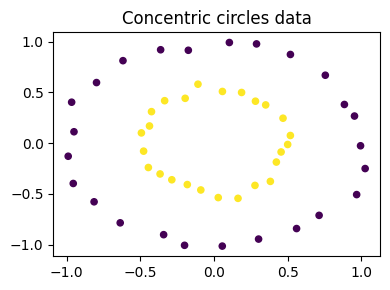

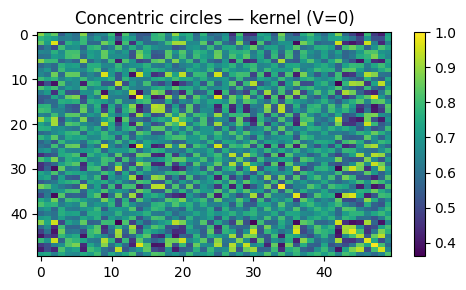

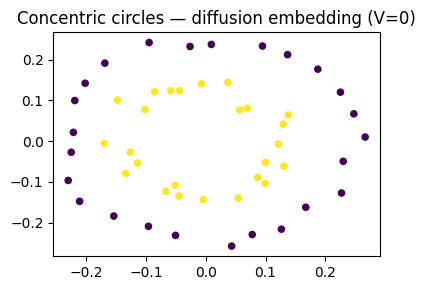

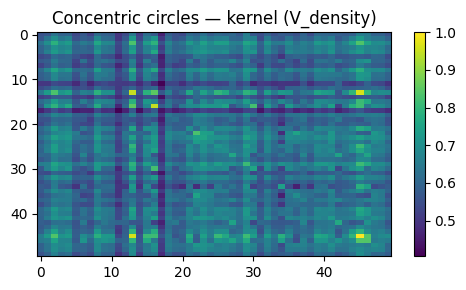

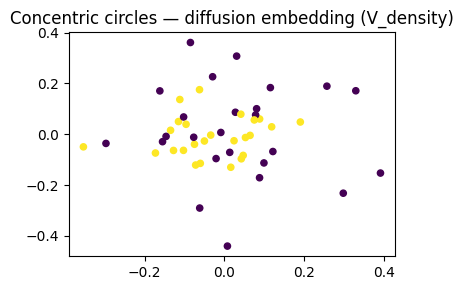

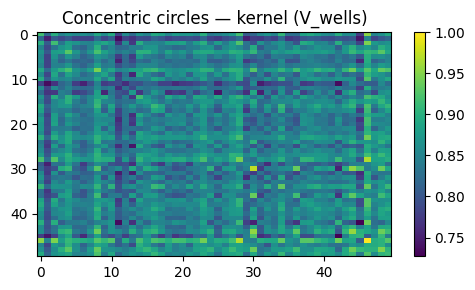

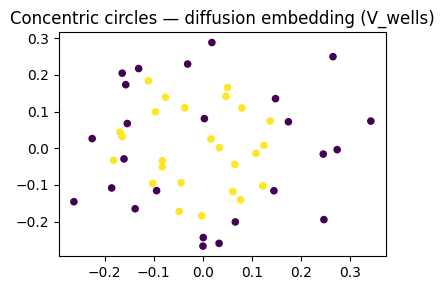


=== Dataset: Moons
 Building K (V=0) ...
 Building K (V_density) ...
 Building K (V_wells) ...

Results for Moons:
 V=0      — ACC = 0.900, F1 = 0.898
 V_density— ACC = 0.820, F1 = 0.816
 V_wells  — ACC = 0.880, F1 = 0.879


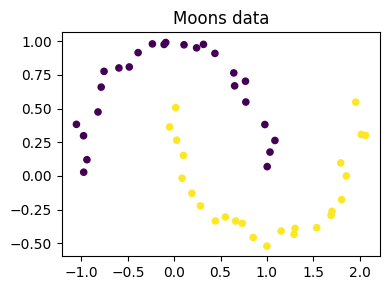

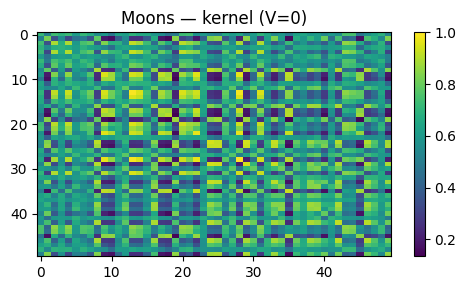

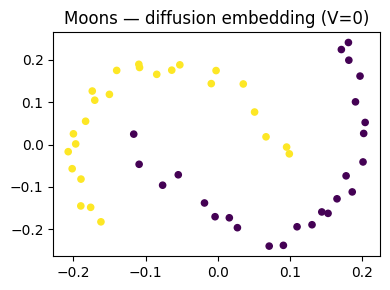

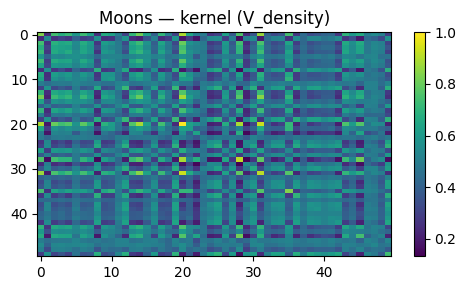

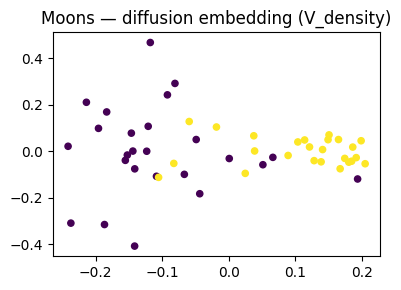

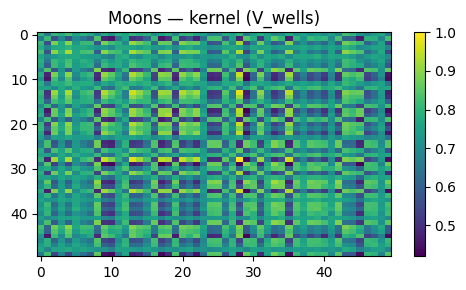

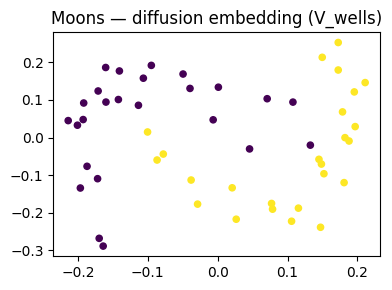


Demo complete.


In [8]:
"""
landmark_fk_circles_fix.py

Modifies the Monte-Carlo path-integral landmark pipeline to work better for
manifold data like concentric circles by projecting endpoints back to the
nearest data point (manifold-aware features), using diffusion-map embedding,
and providing cross-validated accuracy/F1 evaluation.
"""

import numpy as np
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles, make_blobs
from sklearn.manifold import SpectralEmbedding
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from tqdm import trange
from scipy.sparse.linalg import eigs

np.random.seed(1)

#####################
# Monte-Carlo + features
#####################

def simulate_paths_and_logweights(x0, V_fun, T=1.0, Nsteps=25, Mpaths=200, rng=None):
    """Simulate Mpaths unconditioned Brownian endpoints and return endpoints and log-weights."""
    if rng is None:
        rng = np.random.default_rng()
    d = x0.size
    dt = T / Nsteps
    sqrt_dt = np.sqrt(dt)

    endpoints = np.zeros((Mpaths, d))
    logw = np.zeros(Mpaths)

    for m in range(Mpaths):
        z = x0.copy()
        lw = 0.0
        for k in range(Nsteps):
            z = z + sqrt_dt * rng.normal(size=d)
            lw += - V_fun(z) * dt
        endpoints[m] = z
        logw[m] = lw

    return endpoints, logw


def build_feature_project_to_data(endpoints, logw, centers, sigma, X_dataset, nbrs_for_proj,
                                  normalize_weights=True):
    """
    Map each endpoint to the nearest original data point (project to manifold),
    then compute RBF responses to centers and weight them by stabilized weights.
    - endpoints: (M, d)
    - logw: (M,)
    - centers: (m, d)
    - X_dataset: original dataset (n, d)
    - nbrs_for_proj: NearestNeighbors fitted on X_dataset
    """
    M = endpoints.shape[0]
    # stabilize log-weights
    max_lw = np.max(logw)
    w = np.exp(logw - max_lw)        # shifted weights
    if normalize_weights:
        w = w / (w.sum() + 1e-12)

    # project endpoints to nearest original data point (manifold projection)
    _, idx = nbrs_for_proj.kneighbors(endpoints, n_neighbors=1)
    idx = idx.ravel()
    projected = X_dataset[idx]   # shape (M, d)

    # compute RBF responses to centers
    D2 = cdist(projected, centers, 'sqeuclidean')   # (M, m)
    G = np.exp(- D2 / (2 * sigma**2))
    phi = (w[:, None] * G).sum(axis=0) / np.sqrt(max(1, M))
    return phi


def choose_centers_kmeans_or_random(X, m_landmarks=30, rng=None, use_kmeans=True):
    if rng is None:
        rng = np.random.default_rng()
    if use_kmeans:
        kmeans = KMeans(n_clusters=m_landmarks, random_state=int(rng.integers(0,2**31-1)))
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
    else:
        idx = rng.choice(len(X), size=m_landmarks, replace=False)
        centers = X[idx]
    return centers


def median_sigma_heuristic(centers, factor=0.5):
    if centers.shape[0] < 2:
        return 1.0
    med = np.median(pdist(centers))
    sigma = max(1e-6, med * factor)
    return sigma


def fk_kernel_matrix_landmarks_projected(X, V_fun,
                                         T=1.0, Nsteps=25, Mpaths=200,
                                         m_landmarks=40, sigma=None,
                                         centers=None, rng=None,
                                         use_kmeans_centers=True,
                                         normalize_weights=True,
                                         symmetrize_and_jitter=True,
                                         verbose=True):
    """
    Landmark FK with endpoint projection to the dataset X (manifold-aware features).
    Returns kernel K, Phi, centers, sigma.
    """
    if rng is None:
        rng = np.random.default_rng(0)
    n, d = X.shape

    # choose centers (landmarks)
    if centers is None:
        centers = choose_centers_kmeans_or_random(X, m_landmarks, rng=rng, use_kmeans=use_kmeans_centers)

    # sigma heuristic
    if sigma is None:
        sigma = median_sigma_heuristic(centers, factor=0.4)

    # neighbor indexer for projection of endpoints to X
    nbrs_for_proj = NearestNeighbors(n_neighbors=1).fit(X)

    m = centers.shape[0]
    Phi = np.zeros((n, m))

    iterator = trange(n, desc="building features") if verbose else range(n)
    for i in iterator:
        endpoints, logw = simulate_paths_and_logweights(X[i], V_fun, T=T, Nsteps=Nsteps, Mpaths=Mpaths, rng=rng)
        Phi[i] = build_feature_project_to_data(endpoints, logw, centers, sigma, X, nbrs_for_proj, normalize_weights=normalize_weights)

    # build kernel
    K = Phi @ Phi.T
    K = K / (np.max(np.abs(K)) + 1e-12)

    if symmetrize_and_jitter:
        K = 0.5 * (K + K.T)
        K = K + 1e-8 * np.eye(n)

    return K, Phi, centers, sigma


#####################
# Potentials
#####################

def V_zero_factory():
    return lambda x: 0.0

def V_density_knn_factory(X, k=6, lam=5.0):
    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
    dists, idx = nbrs.kneighbors(X)
    mean_d = dists[:,1:].mean(axis=1)
    dens_proxy = 1.0 / (mean_d + 1e-12)
    dmin, dmax = dens_proxy.min(), dens_proxy.max()
    def V(x):
        x = np.atleast_2d(x)
        dists_x, _ = nbrs.kneighbors(x, n_neighbors=k+1)
        md = dists_x[:,1:].mean(axis=1)
        dp = 1.0 / (md + 1e-12)
        dp_norm = (dp - dmin) / (dmax - dmin + 1e-12)
        return float(lam * (1.0 - dp_norm[0]))
    return V

def V_wells_factory(centers, a=1.0):
    centers = np.asarray(centers)
    def V(x):
        x = np.atleast_1d(x)
        D2 = np.sum((x - centers)**2, axis=1)
        return float(a * np.min(D2))
    return V


#####################
# diffusion-map embedding (row-stochastic)
#####################

def diffusion_map_embedding(K, n_components=2, k_eigs=6):
    """
    Compute diffusion-map style embedding from kernel K.
    Steps:
      - build row-stochastic operator P = D^{-1} K
      - take eigenvectors of P^T (left eigenvectors of P) ordered by eigenvalue magnitude
      - skip the first trivial eigenvector (constant) and return next ones
    """
    # ensure symmetry approximately
    K = 0.5 * (K + K.T)
    # row sums
    d = K.sum(axis=1)
    # avoid divide by zero
    P = K / (d[:, None] + 1e-12)
    # compute top k eigenpairs of P^T (to get left eigenvectors of P)
    # we request k_eigs (>= n_components+1)
    vals, vecs = eigs(P.T, k=k_eigs)  # may return complex, take real parts
    vals = np.real(vals)
    vecs = np.real(vecs)
    order = np.argsort(-vals)  # descending by eigenvalue
    vals = vals[order]
    vecs = vecs[:, order]
    # skip first trivial eigenvector (corresponding to eigenvalue 1)
    emb = vecs[:, 1:(1 + n_components)]
    return emb, vals


#####################
# CV evaluation
#####################

def evaluate_embeddings_cv(emb, y, n_splits=5, clf=None):
    if clf is None:
        clf = SVC(kernel='rbf', gamma='scale')
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    acc_scores = []
    f1_scores = []
    for train_idx, test_idx in skf.split(emb, y):
        X_train, X_test = emb[train_idx], emb[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    return np.mean(acc_scores), np.mean(f1_scores)


#####################
# Demo: two datasets
#####################

def run_demo():
    n_points = 50
    X_blobs, y_blobs = make_blobs(n_samples=n_points, centers=[[-2,0],[2,0]], cluster_std=0.6, random_state=2)
    X_circ, y_circ = make_circles(n_samples=n_points, factor=0.5, noise=0.03, random_state=3)
    X_moons, y_moons = make_moons(n_samples=n_points, noise=0.05, random_state=4)

    datasets = [("Two blobs", X_blobs, y_blobs), ("Concentric circles", X_circ, y_circ), ("Moons", X_moons, y_moons)]

    for name, X, y in datasets:
        print("\n=== Dataset:", name)
        # potentials
        V0 = V_zero_factory()
        # stronger lambda for density to discourage off-manifold endpoints (tunable)
        Vdens = V_density_knn_factory(X, k=6, lam=20.0)
        if name == "Two blobs":
            wells_centers = np.array([[-2,0],[2,0]])
        else:
            wells_centers = np.array([X[y==0].mean(axis=0), X[y==1].mean(axis=0)])
        Vwells = V_wells_factory(wells_centers, a=2.0)

        # parameters tuned a bit more for circles
        params = dict(T=1.0, Nsteps=40, Mpaths=400, m_landmarks=50,
                      use_kmeans_centers=True, normalize_weights=True, verbose=False)

        print(" Building K (V=0) ...")
        K0, Phi0, centers0, sigma0 = fk_kernel_matrix_landmarks_projected(X, V0, **params)
        print(" Building K (V_density) ...")
        Kd, Phid, centersd, sigmad = fk_kernel_matrix_landmarks_projected(X, Vdens, **params)
        print(" Building K (V_wells) ...")
        Kw, Phiw, centersw, sigmaw = fk_kernel_matrix_landmarks_projected(X, Vwells, **params)

        # embed using diffusion-map (row-stochastic) for manifold awareness
        emb0, vals0 = diffusion_map_embedding(K0, n_components=2, k_eigs=6)
        embd, valsd = diffusion_map_embedding(Kd, n_components=2, k_eigs=6)
        embw, valsw = diffusion_map_embedding(Kw, n_components=2, k_eigs=6)

        # evaluate with StratifiedKFold
        acc0, f10 = evaluate_embeddings_cv(emb0, y)
        accd, f1d = evaluate_embeddings_cv(embd, y)
        accw, f1w = evaluate_embeddings_cv(embw, y)

        print(f"\nResults for {name}:")
        print(f" V=0      — ACC = {acc0:.3f}, F1 = {f10:.3f}")
        print(f" V_density— ACC = {accd:.3f}, F1 = {f1d:.3f}")
        print(f" V_wells  — ACC = {accw:.3f}, F1 = {f1w:.3f}")

        # plots
        plt.figure(figsize=(4,3))
        plt.title(f"{name} data")
        plt.scatter(X[:,0], X[:,1], c=y, s=20)
        plt.tight_layout(); plt.show()

        for title, K, emb in [("V=0", K0, emb0), ("V_density", Kd, embd), ("V_wells", Kw, embw)]:
            plt.figure(figsize=(5,3))
            plt.title(f"{name} — kernel ({title})")
            plt.imshow(K, aspect='auto')
            plt.colorbar()
            plt.tight_layout(); plt.show()

            plt.figure(figsize=(4,3))
            plt.title(f"{name} — diffusion embedding ({title})")
            plt.scatter(emb[:,0], emb[:,1], c=y, s=20)
            plt.tight_layout(); plt.show()

    print("\nDemo complete.")

if __name__ == "__main__":
    run_demo()



Dataset: CIRCLES

--- Potential: KDE ---


sampling:   0%|          | 0/50 [00:00<?, ?it/s]

sampling: 100%|██████████| 50/50 [00:18<00:00,  2.76it/s]

ACC = 0.520   F1 = 0.500


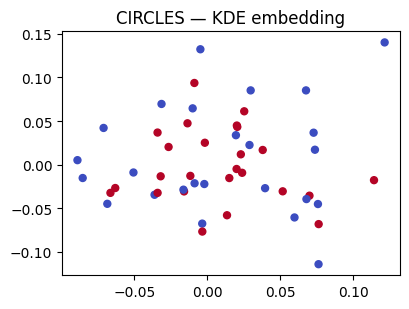


--- Potential: POINT_WELLS ---


sampling: 100%|██████████| 50/50 [00:01<00:00, 25.85it/s]


ACC = 0.540   F1 = 0.520


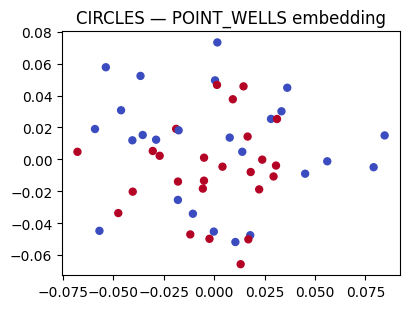


--- Potential: HYBRID ---


sampling: 100%|██████████| 50/50 [00:19<00:00,  2.61it/s]

ACC = 0.620   F1 = 0.615


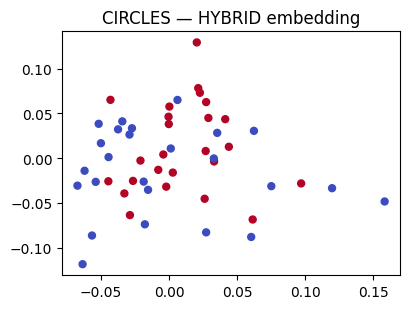


Dataset: MOONS

--- Potential: KDE ---


sampling: 100%|██████████| 50/50 [00:17<00:00,  2.91it/s]

ACC = 0.660   F1 = 0.630


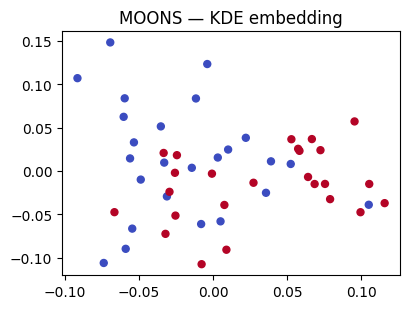


--- Potential: POINT_WELLS ---


sampling: 100%|██████████| 50/50 [00:01<00:00, 26.08it/s]


ACC = 0.740   F1 = 0.738


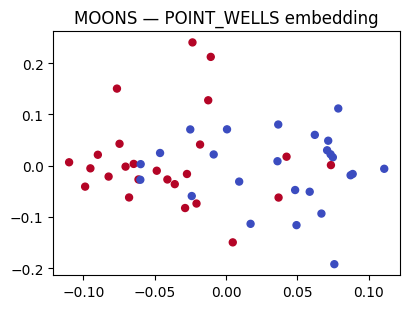


--- Potential: HYBRID ---


sampling: 100%|██████████| 50/50 [00:19<00:00,  2.60it/s]

ACC = 0.720   F1 = 0.718


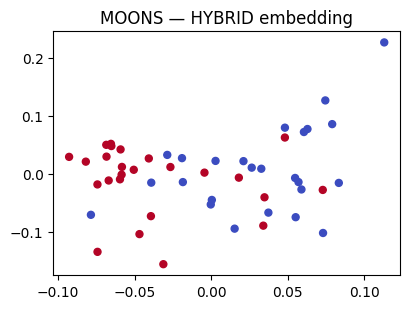


DONE.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.neighbors import KernelDensity, NearestNeighbors
from sklearn.manifold import SpectralEmbedding
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from scipy.spatial.distance import cdist
from tqdm import trange

np.random.seed(0)

# ============================================================
# 1. MONTE-CARLO FEYNMAN–KAC PATH SAMPLING (YOUR METHOD)
# ============================================================

def simulate_paths_and_weights(x0, V_fun, T=1.0, Nsteps=20, Mpaths=60):
    d = x0.shape[0]
    dt = T / Nsteps
    sqrt_dt = np.sqrt(dt)

    endpoints = np.zeros((Mpaths, d))
    logw = np.zeros(Mpaths)       # <-- store all log-weights

    for m in range(Mpaths):
        z = x0.copy()
        lw = 0.0
        for k in range(Nsteps):
            z = z + sqrt_dt * np.random.normal(size=d)
            lw += -V_fun(z) * dt
        endpoints[m] = z
        logw[m] = lw

    # safe log-normalization
    logw = logw - np.max(logw)
    weights = np.exp(logw)

    return endpoints, weights

def features_from_endpoints(endpoints, weights, centers, sigma=0.25):
    D = cdist(endpoints, centers, 'sqeuclidean')
    G = np.exp(- D / (2 * sigma**2))
    feat = (weights[:, None] * G).sum(axis=0) / np.sqrt(len(weights))
    return feat


def approximate_kernel_matrix(X, V_fun, centers, T=1.0, Nsteps=20, Mpaths=60, sigma=0.25):
    n, d = X.shape
    m = centers.shape[0]
    Phi = np.zeros((n, m))

    for i in trange(n, desc="sampling"):
        endpoints, weights = simulate_paths_and_weights(X[i], V_fun, T=T, Nsteps=Nsteps, Mpaths=Mpaths)
        Phi[i] = features_from_endpoints(endpoints, weights, centers, sigma)

    # Nyström-like kernel reconstruction
    K = Phi @ Phi.T
    # normalize
    K = K / (np.max(np.abs(K)) + 1e-12)
    return K


# ============================================================
# 2. POTENTIALS
# ============================================================

# --- KDE potential (very good for moons)
def V_kde_factory(X, bandwidth=0.15, lam=5.0):
    kde = KernelDensity(bandwidth=bandwidth).fit(X)
    def V(x):
        x2 = np.atleast_2d(x)
        lp = kde.score_samples(x2)[0]
        return float(-lam * lp)
    return V


# --- Point-wells around rings (best for circles)
def make_ring_point_wells(X, y, a=40.0, n_per_ring=40):
    center = X.mean(axis=0)

    # estimate radii per class
    radii = []
    for cls in np.unique(y):
        radii.append(np.mean(np.linalg.norm(X[y==cls] - center, axis=1)))

    # build wells
    well_centers = []
    for r in radii:
        thetas = np.linspace(0, 2*np.pi, n_per_ring, endpoint=False)
        for th in thetas:
            well_centers.append(center + r * np.array([np.cos(th), np.sin(th)]))

    well_centers = np.asarray(well_centers)

    def V(x):
        x = np.atleast_1d(x)
        return float(a * np.min(np.sum((well_centers - x)**2, axis=1)))

    return V, well_centers


# --- Hybrid: KDE + point wells
def V_hybrid_factory(V1, V2, alpha=1.0, beta=1.0):
    def V(x):
        return float(alpha * V1(x) + beta * V2(x))
    return V


# ============================================================
# 3. STRATIFIED K-FOLD EVALUATION
# ============================================================

from sklearn.svm import SVC

def evaluate_embedding(emb, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    accs, f1s = [], []

    clf = SVC(kernel='rbf', gamma='scale')

    for train, test in skf.split(emb, y):
        clf.fit(emb[train], y[train])
        yp = clf.predict(emb[test])
        accs.append(accuracy_score(y[test], yp))
        f1s.append(f1_score(y[test], yp, average='macro'))

    return np.mean(accs), np.mean(f1s)


# ============================================================
# 4. DATASETS
# ============================================================

datasets = [
    ("CIRCLES", *make_circles(n_samples=50, noise=0.04, factor=0.5, random_state=3)),
    ("MOONS", *make_moons(n_samples=50, noise=0.06, random_state=1)),
]


# ============================================================
# 5. MAIN LOOP
# ============================================================

for name, X, y in datasets:
    print("\n====================================")
    print("Dataset:", name)
    print("====================================")

    # landmarks for feature map
    rng = np.random.default_rng(0)
    m_landmarks = 25
    idx = rng.choice(len(X), size=m_landmarks, replace=False)
    centers = X[idx]

    # potentials
    V_kde = V_kde_factory(X, bandwidth=0.12 if name=="MOONS" else 0.10, lam=5.0)
    V_pw, pw_centers = make_ring_point_wells(X, y, a=40.0, n_per_ring=40)
    V_hybrid = V_hybrid_factory(V_kde, V_pw, alpha=0.7, beta=0.7)

    pot_list = [
        ("KDE", V_kde),
        ("POINT_WELLS", V_pw),
        ("HYBRID", V_hybrid)
    ]

    # ----- Compute kernels, embeddings, and accuracy -----
    for (pname, V) in pot_list:
        print(f"\n--- Potential: {pname} ---")

        K = approximate_kernel_matrix(X, V, centers,
                                      T=1.0, Nsteps=30, Mpaths=70, sigma=0.4)

        # Symmetrize
        K = (K + K.T) / 2

        # Embedding
        emb = SpectralEmbedding(n_components=2, affinity='precomputed').fit_transform(K)

        # Evaluate
        acc, f1 = evaluate_embedding(emb, y)
        print(f"ACC = {acc:.3f}   F1 = {f1:.3f}")

        # Plot
        plt.figure(figsize=(4.2,3.2))
        plt.title(f"{name} — {pname} embedding")
        plt.scatter(emb[:,0], emb[:,1], c=y, s=25, cmap="coolwarm")
        plt.tight_layout()
        plt.show()

print("\nDONE.")
